In [0]:
import pandas as pd
pd.set_option('display.max.columns', 100)
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams['image.cmap'] = 'viridis'

In [0]:
df = pd.read_csv('adult.csv')

In [3]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [4]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [5]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [6]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [7]:
# Mean age of Male and Female
df['age'].mean()

38.58164675532078

In [8]:
# Mean age of Female
df[df['sex'] == 'Female']['age'].mean()

36.85823043357163

In [9]:
# Mean age of Male
df[df['sex'] == 'Male']['age'].mean()

39.43354749885268

In [10]:
# Number of Male and Female
df['sex'].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

In [11]:
# Percentage of citizens from germany
num_germany = df[df['native.country'] == 'Germany']['native.country'].value_counts()
total = df['native.country'].count()
per = num_germany/total
print('Percentage {}'.format(per*100))


Percentage Germany    0.420749
Name: native.country, dtype: float64


In [12]:
# Mean and S.D. of age for  those who earn >50K 
cond_mean = df[df['income']  ==  '>50K']['age'].mean()
cond_std = df[df['income'] == '>50K']['age'].std()
print('Mean = {} , S.D. = {}'.format(cond_mean, cond_std))

Mean = 44.24984058155847 , S.D. = 10.519027719851826


In [13]:
# Mean and S.D. of age for  those who earn <50K 
cond_mean = df[df['income']  ==  '<=50K']['age'].mean()
cond_std = df[df['income'] == '<=50K']['age'].std()
print('Mean = {} , S.D. = {}'.format(cond_mean, cond_std))

Mean = 36.78373786407767 , S.D. = 14.020088490824879


In [14]:
# How many white people are earning above 50K
cond_mean = df[(df['income'] == '>50K') & (df['race'] == 'White')]['race'].count()
cond_mean

7117

In [22]:
# People who earn >50K have atleast high school education
df[(df['education'] == '7th-8th') & (df['income'] == '>50K')]['income']

479      >50K
597      >50K
742      >50K
2609     >50K
2633     >50K
2775     >50K
2970     >50K
2971     >50K
2980     >50K
3291     >50K
4390     >50K
4415     >50K
4749     >50K
7508     >50K
8344     >50K
8617     >50K
8861     >50K
9596     >50K
9955     >50K
10831    >50K
10961    >50K
11510    >50K
11872    >50K
12227    >50K
14187    >50K
15121    >50K
15156    >50K
16610    >50K
18066    >50K
20706    >50K
21386    >50K
21721    >50K
21909    >50K
24639    >50K
26130    >50K
27101    >50K
27874    >50K
29196    >50K
29619    >50K
29678    >50K
Name: income, dtype: object

In [33]:
# Age statistics according to race
columns_to_show = ['age']
df.groupby(['race'])[columns_to_show].describe(percentiles = [])

age                                        
                      count       mean        std   min   50%   max
race                                                               
Amer-Indian-Eskimo    311.0  37.173633  12.447130  17.0  35.0  82.0
Asian-Pac-Islander   1039.0  37.746872  12.825133  17.0  36.0  90.0
Black                3124.0  37.767926  12.759290  17.0  36.0  90.0
Other                 271.0  33.457565  11.538865  17.0  31.0  77.0
White               27816.0  38.769881  13.782306  17.0  37.0  90.0

In [55]:
# Age statistics according to Gender
columns_to_show = ['age']
df.groupby(['sex'])[columns_to_show].describe(percentiles = [])

age                                        
          count       mean        std   min   50%   max
sex                                                    
Female  10771.0  36.858230  14.013697  17.0  35.0  90.0
Male    21790.0  39.433547  13.370630  17.0  38.0  90.0

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


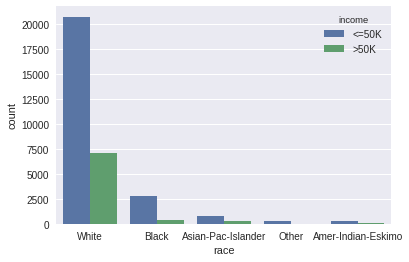

In [40]:
# Stats of income according to race
sns.countplot(x='race', hue='income', data=df);


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


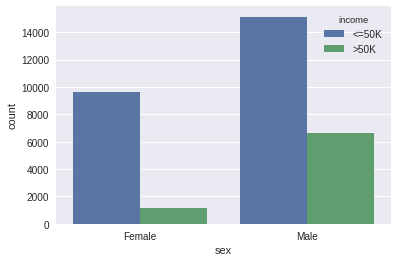

In [41]:
# Stats of income according to race
sns.countplot(x='sex', hue='income', data=df);

In [47]:
# Maximum hour a person work per week
df['hours.per.week'].max()

99

In [53]:
# Number of people with max hour of work per week 
df[(df['hours.per.week'] == 99) & (df['income'] == '>50K')]['sex'].count()

25